In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

import sys

sys.path.append("../")

from cube3_game import Cube3Game

In [22]:
with open("../assets/tests/deepcube/data_0.pkl", "rb") as f:
    optim = pickle.load(f)

In [23]:
act = set()
for s in optim['solutions']:
    for a in s:
        act.add(a[0])
    # break

In [24]:
act

{'B', 'D', 'F', 'L', 'R', 'U'}

In [32]:
game = Cube3Game("../assets/envs/cube_3_3_3_actions.pickle")

In [33]:
df = pd.read_pickle("../assets/reports/cpp_reports.pkl")

In [34]:
parallel_df = pd.read_pickle("../assets/reports/cpp_parallel_reports.pkl")

In [35]:
for r in parallel_df.to_dict("records"):    
    state = r['state']
    solution = r['solution']
    visit_nodes = r['visit_nodes']
    i = r['i']
    if visit_nodes == 0:
        continue

    for a in solution[1:]:
        state = game.apply_action(state, a)

    if not game.is_goal_by_state(state):
        print("error i: ", i)
        break

In [36]:
print("duration: ", df["duration_sec"].sum() / 3600)
print("duration parallel: ", parallel_df["duration_sec"].sum() / 3600)

duration:  12.255812500000001
duration parallel:  0.9772480555555555


In [37]:
df["solution_len"] = [len(s) for s in df["solution"]]
parallel_df["solution_len"] = [len(s) for s in parallel_df["solution"]]

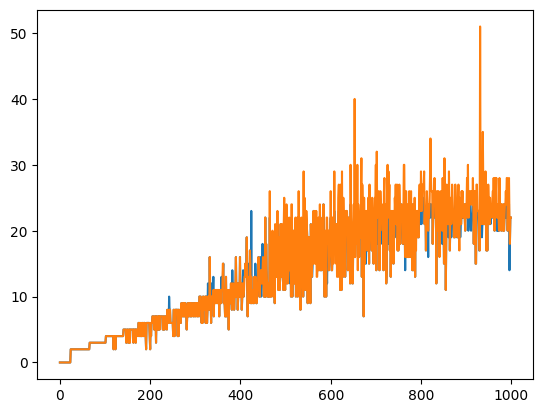

In [38]:
plt.plot(df["solution_len"])
plt.plot(parallel_df["solution_len"])

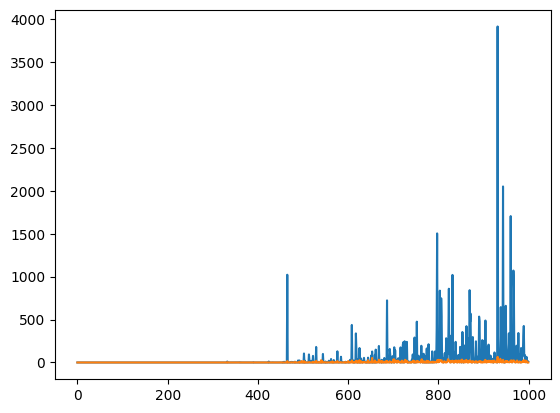

In [39]:
plt.plot(df["duration_sec"])
plt.plot(parallel_df["duration_sec"])

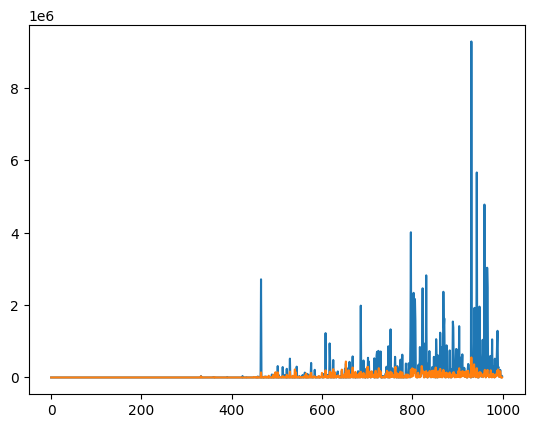

In [40]:
plt.plot(df["visit_nodes"])
plt.plot(parallel_df["visit_nodes"])

In [41]:
df_1000 = pd.read_pickle("../assets/reports/cpp_reports_1000.pkl")
parallel_df_1000 = pd.read_pickle("../assets/reports/cpp_parallel_reports_1000.pkl")

In [42]:
df_1000["solution_len"] = [len(s) for s in df_1000["solution"]]
parallel_df_1000["solution_len"] = [len(s) for s in parallel_df_1000["solution"]]

In [47]:
df_1000["solution_len"].mean()

23.0

In [48]:
parallel_df_1000["solution_len"].mean()

25.0

In [55]:
df_1000["duration_sec"].mean() / 60

3.3279733333333326

In [58]:
parallel_df_1000["duration_sec"].mean() / 60

0.2725258333333333